# Entrega ML

#### Importaciones:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import scipy.stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## ANÁLISIS EXPLORATORIO DE DATOS

### EXPLORACION DE DATOS

In [715]:
air = pd.read_csv(".\AirQuality.csv", sep= ";" )

In [716]:
air.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


#### Información

In [717]:
air.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [718]:
air.shape

(9471, 17)

In [719]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [720]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [721]:
air.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [722]:
air.describe(exclude=object).round(2)

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,0.0,0.0
mean,1048.99,-159.09,894.60,168.62,794.99,58.15,1391.48,975.07,NaN,NaN
std,329.83,139.79,342.33,257.43,321.99,126.94,467.21,456.94,NaN,NaN
min,-200.00,-200.00,-200.00,-200.00,-200.00,-200.00,-200.00,-200.00,NaN,NaN
25%,921.00,-200.00,711.00,50.00,637.00,53.00,1185.00,700.00,NaN,NaN
50%,1053.00,-200.00,895.00,141.00,794.00,96.00,1446.00,942.00,NaN,NaN
75%,1221.00,-200.00,1105.00,284.00,960.00,133.00,1662.00,1255.00,NaN,NaN
max,2040.00,1189.00,2214.00,1479.00,2683.00,340.00,2775.00,2523.00,NaN,NaN


In [723]:
air.describe(include=object).round(2)

,Date,Time,CO(GT),C6H6(GT),T,RH,AH
count,9357,9357,9357,9357,9357,9357,9357
unique,391,24,104,408,437,754,6684
top,21/09/2004,18.00.00,-200,"-200,0",-200,-200,-200
freq,24,390,1592,366,366,366,366


In [724]:
air.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [725]:
air.isna().sum()/len(air)*100

Date               1.203674
Time               1.203674
CO(GT)             1.203674
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)           1.203674
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                  1.203674
RH                 1.203674
AH                 1.203674
Unnamed: 15      100.000000
Unnamed: 16      100.000000
dtype: float64

In [726]:
air.duplicated().sum()

113

### PROCESAMIENTO DE DATOS

In [727]:
air_copy = air.copy()

#### CARDINALIDAD

In [728]:
for i in air_copy.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(air_copy[i].nunique()/air_copy.shape[0])*100:.2f}%")

La cardinalidad de la variable Date es 4.13%
La cardinalidad de la variable Time es 0.25%
La cardinalidad de la variable CO(GT) es 1.10%
La cardinalidad de la variable C6H6(GT) es 4.31%
La cardinalidad de la variable T es 4.61%
La cardinalidad de la variable RH es 7.96%
La cardinalidad de la variable AH es 70.57%


##### VALORES NULOS Y DUPLICADOS

- Eliminar duplicados

In [729]:
air_copy= air_copy.drop_duplicates()

In [730]:
air_copy

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028",NaN,NaN


- Eliminar filas y columnas ya que he visto que no son necesarias y no tienen ningun dato en ninguna columna ni fila

In [731]:
air_copy = air_copy.drop(["Unnamed: 15", "Unnamed: 16"], axis=1)

In [732]:
air_copy

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [733]:
air_copy.duplicated().sum()

0

In [734]:
air_copy.isna().sum()

Date             1
Time             1
CO(GT)           1
PT08.S1(CO)      1
NMHC(GT)         1
C6H6(GT)         1
PT08.S2(NMHC)    1
NOx(GT)          1
PT08.S3(NOx)     1
NO2(GT)          1
PT08.S4(NO2)     1
PT08.S5(O3)      1
T                1
RH               1
AH               1
dtype: int64

In [735]:
air_copy[air_copy.isna().any(axis=1)]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [736]:
air_copy = air_copy.drop(9357)

In [737]:
air_copy.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [738]:
# separar fecha y poner año, dia y mes en distintas columnas
air_copy["Date"]= pd.to_datetime(air_copy["Date"], format="%d/%m/%Y")

air_copy["Year"]= air_copy["Date"].dt.year
air_copy["Month"]= air_copy["Date"].dt.month
air_copy["Day"]= air_copy["Date"].dt.day


In [739]:
# borrar columna date

air_copy = air_copy.drop("Date", axis=1)

In [740]:
air_copy.isna().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Year             0
Month            0
Day              0
dtype: int64

#### COLUMNA TIME

In [741]:
air_copy["Time"]= air_copy["Time"].str.split(".").str[0]

air_copy.rename(columns={"Time": "Time(H)"}, inplace=True)


In [742]:
air_copy

,Time(H),CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,18,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10
1,19,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10
2,20,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10
3,21,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10
4,22,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",2005,4,4
9353,11,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",2005,4,4
9354,12,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",2005,4,4
9355,13,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",2005,4,4


In [743]:
air_copy.isna().sum()

Time(H)          0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Year             0
Month            0
Day              0
dtype: int64

### ANÁLISIS EXPLORATORIO Y VISUALIZACIÓN

In [744]:
air_copy

,Time(H),CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,18,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10
1,19,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10
2,20,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10
3,21,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10
4,22,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",2005,4,4
9353,11,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",2005,4,4
9354,12,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",2005,4,4
9355,13,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",2005,4,4


##### Significado de las columnas

Time: Representa el tiempo de la observación en horas.

CO(GT): Concentración de monóxido de carbono (CO) en partes por millón (ppm).

PT08.S1(CO): Concentración de monóxido de carbono corregida en un sensor específico.

NMHC(GT): Concentración de hidrocarburos no metánicos en microgramos por metro cúbico (µg/m³).

C6H6(GT): Concentración de benceno en microgramos por metro cúbico (µg/m³).

PT08.S2(NMHC): Concentración de hidrocarburos no metánicos corregida en un sensor específico.

NOx(GT): Concentración de óxidos de nitrógeno (NOx) en partes por millón (ppm).

PT08.S3(NOx): Concentración de óxidos de nitrógeno corregida en un sensor específico.

NO2(GT): Concentración de dióxido de nitrógeno (NO2) en partes por millón (ppm).

PT08.S4(NO2): Concentración de dióxido de nitrógeno corregida en un sensor específico.

PT08.S5(O3): Concentración de ozono (O3) corregida en un sensor específico.

T: Temperatura en grados Celsius (°C).

RH: Humedad relativa en porcentaje (%).

AH: Humedad absoluta.

Year: Año de la observación.

Month: Mes de la observación.

Day: Día del mes de la observación.

#### Información

In [602]:
air_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time(H)        9357 non-null   object 
 1   CO(GT)         9357 non-null   object 
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   object 
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   object 
 12  RH             9357 non-null   object 
 13  AH             9357 non-null   object 
 14  Year           9357 non-null   int32  
 15  Month          9357 non-null   int32  
 16  Day            9357 non-null   int32  
dtypes: float64(8), int32(3), object(6)
memory usage: 1.2+ MB


In [603]:
air_copy

,Time(H),CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,18,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10
1,19,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10
2,20,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10
3,21,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10
4,22,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",2005,4,4
9353,11,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",2005,4,4
9354,12,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",2005,4,4
9355,13,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",2005,4,4


In [604]:
air_copy= air_copy.replace(',', '.', regex=True)

In [605]:
air_copy['CO(GT)']= pd.to_numeric(air_copy['CO(GT)'], errors='coerce')
air_copy['C6H6(GT)']= pd.to_numeric(air_copy['C6H6(GT)'], errors='coerce')
air_copy['T']= pd.to_numeric(air_copy['T'], errors='coerce')
air_copy['RH'] = pd.to_numeric(air_copy['RH'], errors='coerce')
air_copy['AH']= pd.to_numeric(air_copy['AH'], errors='coerce')

In [606]:
air_copy

,Time(H),CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10
1,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10
2,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10
3,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10
4,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4
9353,11,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4
9354,12,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4
9355,13,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4


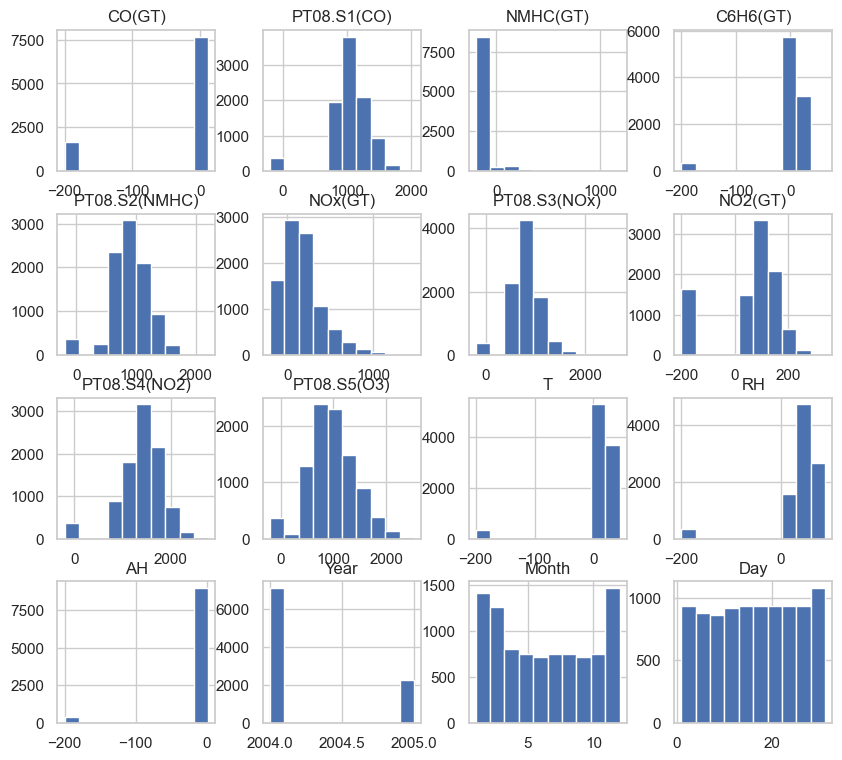

In [607]:
air_copy.hist(figsize=(10, 9));

#### Análisis graficos

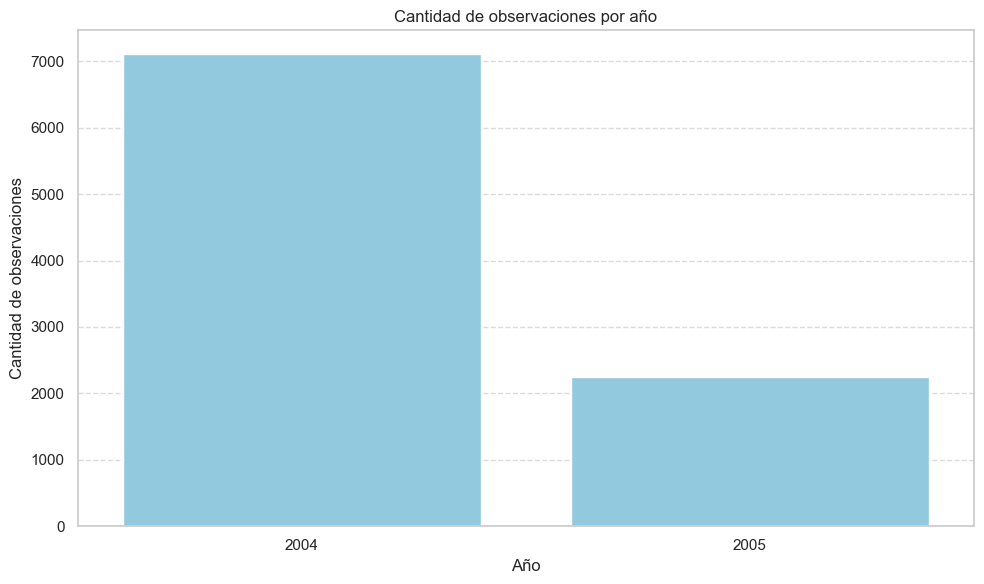

In [608]:
a= air_copy["Year"].value_counts().sort_index()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=a.index, y=a.values, color="skyblue")
plt.title("Cantidad de observaciones por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de observaciones")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

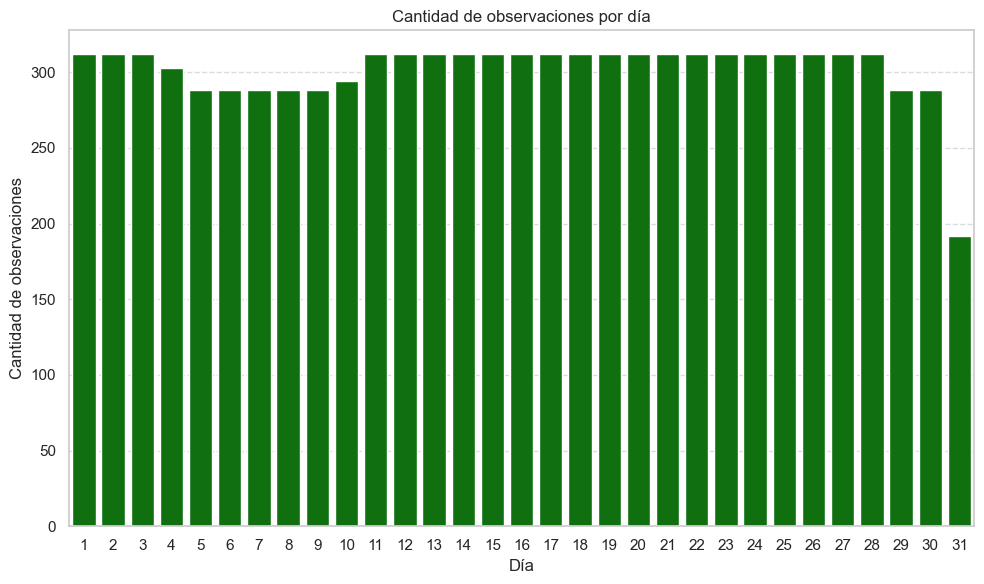

In [609]:
d= air_copy["Day"].value_counts().sort_index()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=d.index, y=d.values, color="green")
plt.title("Cantidad de observaciones por día")
plt.xlabel("Día")
plt.ylabel("Cantidad de observaciones")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

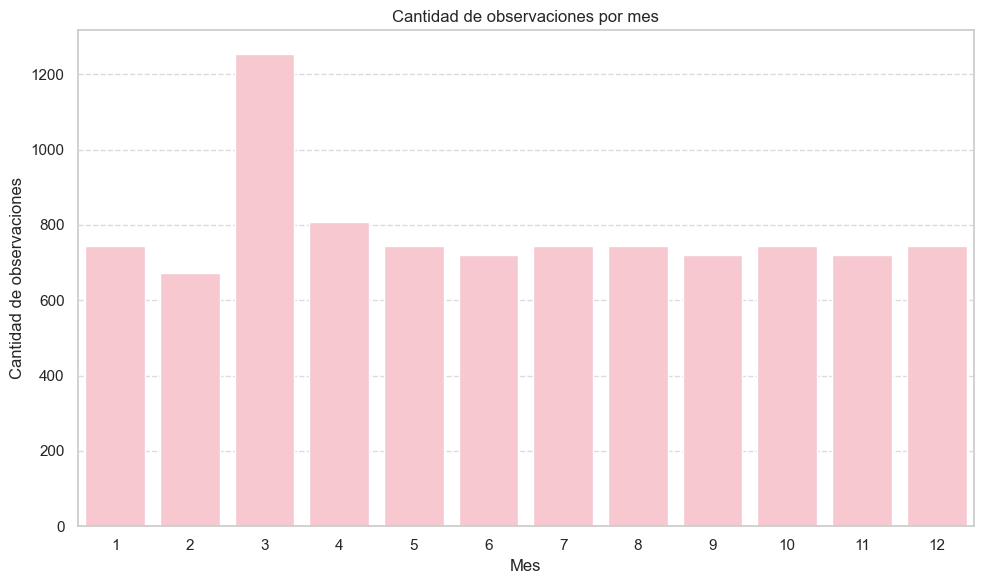

In [610]:
m= air_copy["Month"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=m.index, y=m.values, color="pink")
plt.title("Cantidad de observaciones por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de observaciones")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

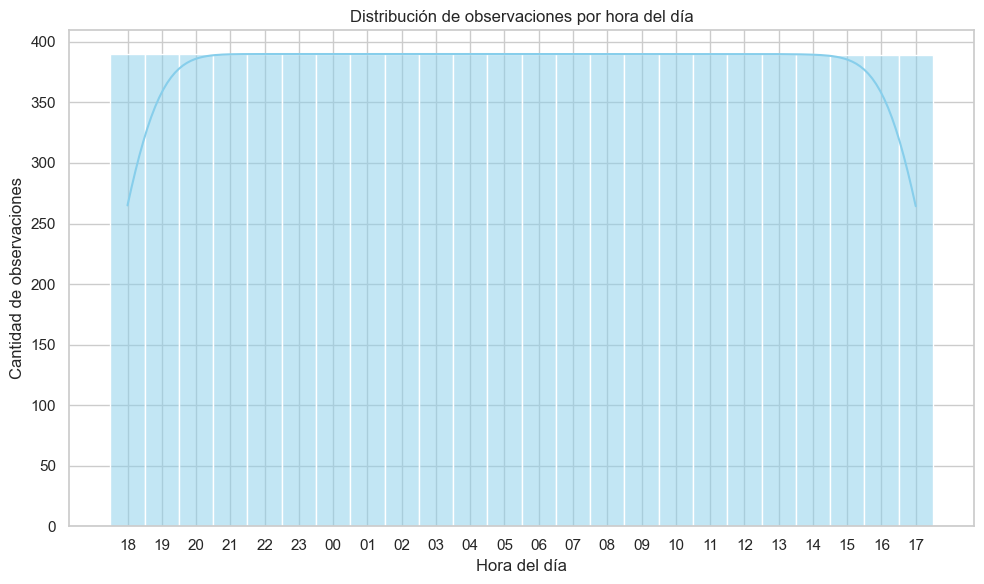

In [611]:
# TIME
plt.figure(figsize=(10, 6))
sns.histplot(data=air_copy, x="Time(H)", bins=24, kde=True, color="skyblue")
plt.title("Distribución de observaciones por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de observaciones")

plt.tight_layout()
plt.show()

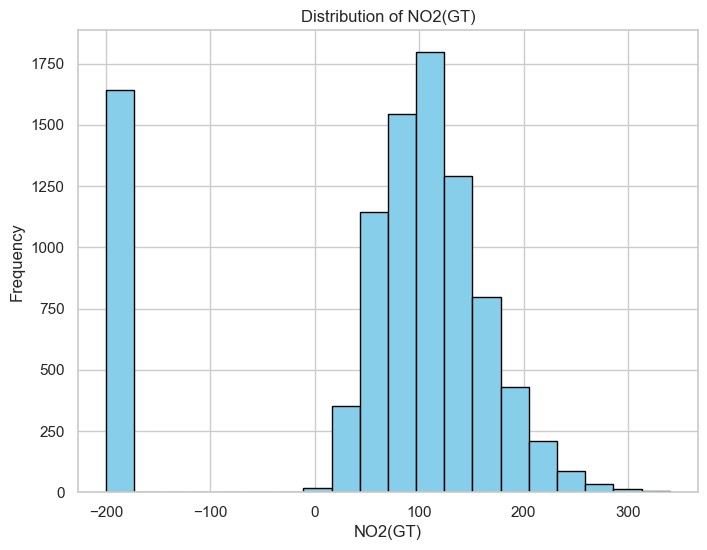

In [612]:
plt.figure(figsize=(8, 6))
plt.hist(air_copy['NO2(GT)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('NO2(GT)')
plt.ylabel('Frequency')
plt.title('Distribution of NO2(GT)')
plt.grid(True)
plt.show()

In [613]:
air_copy.head(1)

,Time(H),CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10


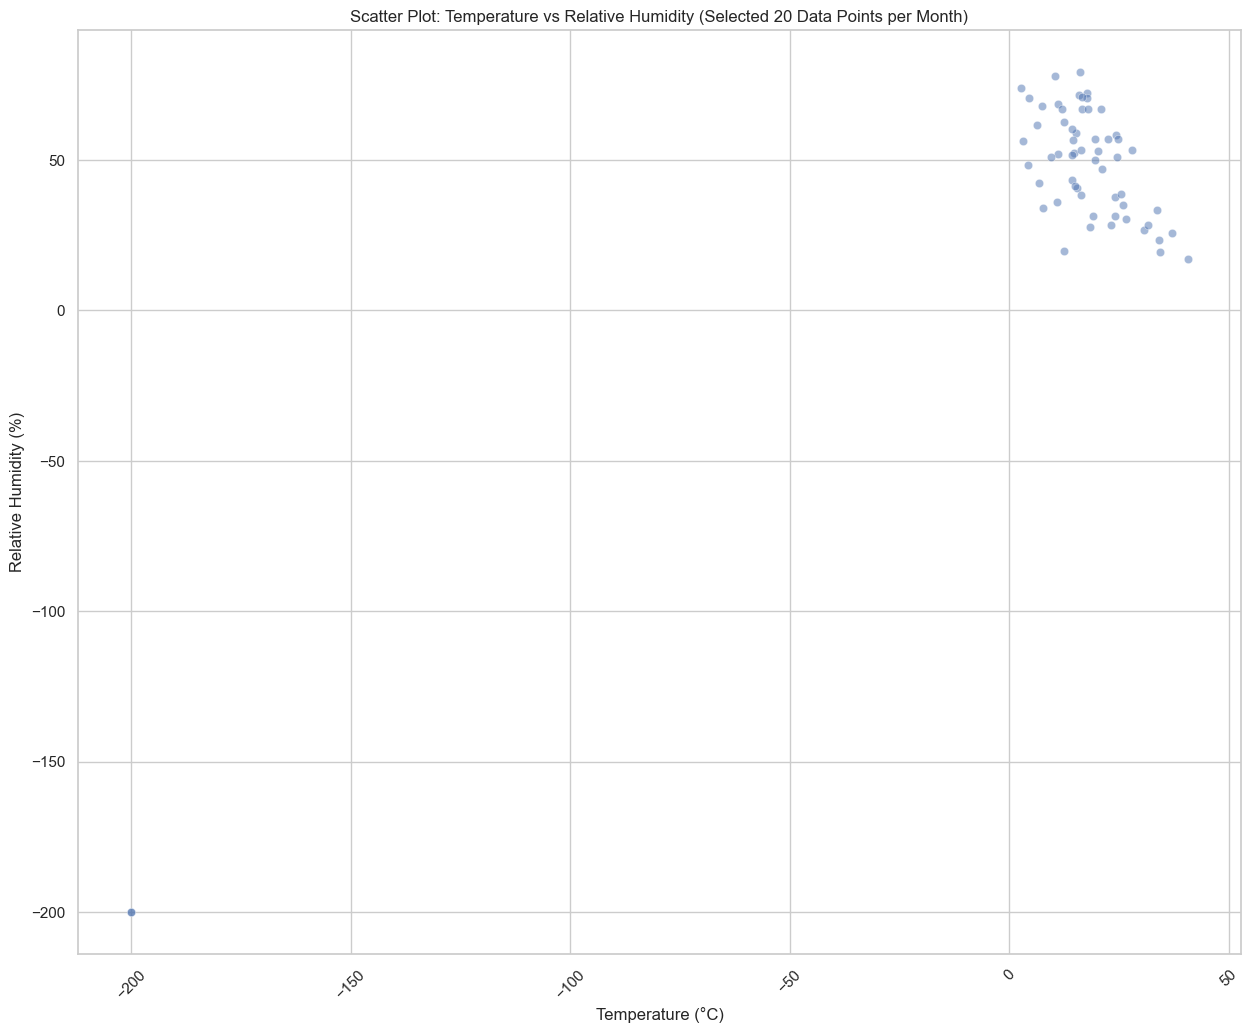

In [614]:
def select_20_data(group):
    if len(group) >= 5:
        return group.sample(n=5)
    else:
        return group

selected_df = air_copy.groupby("Month").apply(select_20_data)
plt.figure(figsize=(15, 12)) 

sns.scatterplot(data=selected_df, x="T", y="RH", alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.title("Scatter Plot: Temperature vs Relative Humidity (Selected 20 Data Points per Month)")
plt.xticks(rotation=45) 
plt.show()

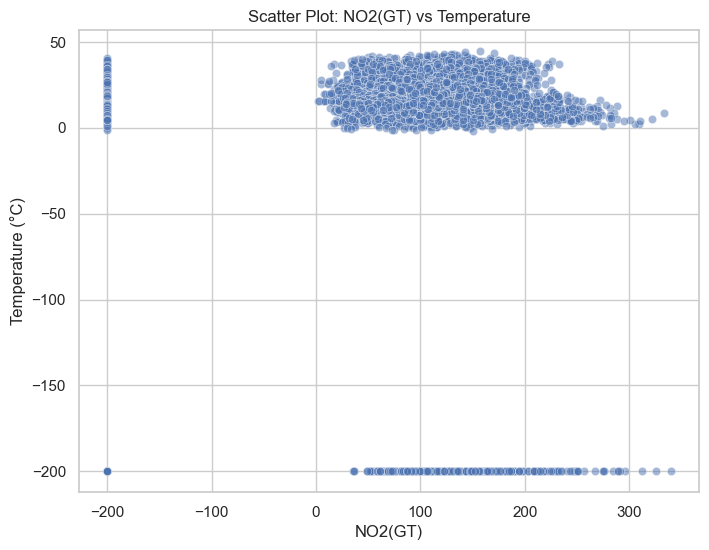

In [615]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=air_copy, x="NO2(GT)", y="T", alpha=0.5)
plt.xlabel("NO2(GT)")
plt.ylabel("Temperature (°C)")
plt.title("Scatter Plot: NO2(GT) vs Temperature")
plt.show()

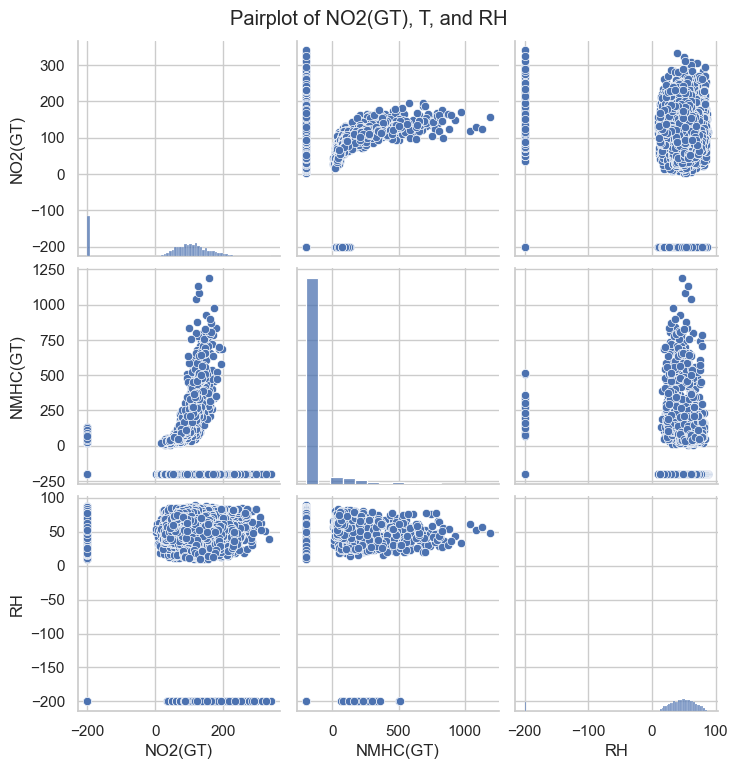

In [616]:
variables = ['NO2(GT)', 'NMHC(GT)', 'RH']

sns.pairplot(air_copy[variables])
plt.suptitle('Pairplot of NO2(GT), T, and RH', y=1.02)
plt.show()

### GUARDAR DATASET

In [617]:
air_copy.to_csv("air.csv",index=False)